![A popcorn pic](images\1.jpg)

# Movie industry Analysis for microsoft. 
## Author: Yussuf Hersi
Overview

As part of my assignment, I have been tasked with creating a framework for Microsoft to explore what kind of movies are performing the best at the box office. In order to achieve this, I will analyze various factors such as movie genres, release dates, budgets, and ratings to identify trends and patterns in box office success.

## Final Project Submission

Please fill out:
* Student name: Yussuf Hersi
* Student pace: full time
* Scheduled project review date/time:12/3/23 
* Instructor name: William Okomba
* Blog post URL:


## Business Problem
I have been informed that Microsoft wants a piece of the multi-billion dollar movie-making industry, but that they are unsure of where to begin. The challenge for their new movie studio is that they are ready to jump into the industry but do not have the necessary knowledge to move forward. To assist them with this goal, I have been looking at the movies that performed highest in worldwide box office amounts. By analyzing the movies that have been most successful recently, I can make recommendations about attributes that Microsoft's movies should have in order to achieve the highest revenue. I have based my analysis on four main factors:

* Movie Type (Genre/Creative Type/Production Method): What types of movie content are currently most successful?
* Release Month: When is the most lucrative time of year to release a movie?
* Production Budget: What budget amount tends to achieve the highest box office gross?
* Additional Attributes: Based on these findings, what else do top-grossing movies have in common
* I chose these questions after considering the business problem and combing through the data I obtained. I have determined that the answers to these questions are integral to the steps that should be taken when considering how to produce the most profitable movie in today's world.

#### I used to different datasets and cleaned them to draw the best conclusions from it.

In [2]:
# Your code here - remember to use markdown cells for comments as well!
import pandas as pd
import requests
import csv 
import matplotlib.pyplot as plt
import numpy as np
from bs4 import BeautifulSoup as soup 
import sqlite3
import seaborn as sns

In [3]:
df1=pd.read_csv(r"C:\Users\Yussuf Hersi\OneDrive\Desktop\Phase1_project\dsc-phase-1-project-v2-4\zippedData\tn.movie_budgets_unzipped.csv")

In [4]:
df1

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [5]:

# Checking the number of null values in each column.
df1.isnull().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

### I was lucky my first dataset has no null values.

### I am connecting to the database to create a data frame that I can work with using sqlite3 and pandas packages in python.

In [6]:
# Connecting to the database

conn = sqlite3.connect(r"C:\Users\Yussuf Hersi\OneDrive\Desktop\lapiecontent\Phase1_project\dsc-phase-1-project-v2-4\zippedData\im.db\im.db")

In [7]:
# Selecting all from the table movie_basics in the database
querry = """
select * from movie_basics;"""


In [8]:
# converting the values from the selected tables to data frame
df2 = pd.read_sql(querry,conn)
df2

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [9]:
# checking the number of columns in the database 
df2.columns

Index(['movie_id', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres'],
      dtype='object')

In [10]:
# Accessing the values in the next table.
querry1=""" SELECT * FROM movie_ratings"""

In [11]:
 
df3 = pd.read_sql(querry1,conn)
df3

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [12]:
#merging the data frames created from the database by the movie_id column
merge1=pd.merge(df2,df3, on ="movie_id")

In [13]:
merge1.columns

Index(['movie_id', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres', 'averagerating', 'numvotes'],
      dtype='object')

In [14]:
#checking for any missing values in new merged dataframe
merge1.isnull().sum()

movie_id              0
primary_title         0
original_title        0
start_year            0
runtime_minutes    7620
genres              804
averagerating         0
numvotes              0
dtype: int64

In [15]:
merge1

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...,...,...,...,...
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136
73853,tt9914642,Albatross,Albatross,2017,NaN,Documentary,8.5,8
73854,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,None,6.6,5


### Here I realized there are a lot of missing values for the column runtime so I am gathering more information
### about the missing values in the data and then I am going to fill them with the mean of the existing  values

In [16]:
# finding the description of the data
merge1['runtime_minutes'].describe()

count    66236.000000
mean        94.654040
std        208.574111
min          3.000000
25%         81.000000
50%         91.000000
75%        104.000000
max      51420.000000
Name: runtime_minutes, dtype: float64

In [17]:
#finding the mean of runtime_minutes column
mean_merge=merge1['runtime_minutes'].mean()

In [18]:
# filling the mean_merge in the missing values
merge1['runtime_minutes']=merge1['runtime_minutes'].fillna(mean_merge)

#### Now that we filled the missing values in the runtime_minutes column We also should fill the missing values in the in the genre column with modal genre.

In [19]:
#Finding the modal genre for the genres column
modal_genres=merge1['genres'].mode()[0]

In [20]:
#Replacing the nun values in genres column with the modal genre
merge1['genres']= merge1['genres'].fillna(modal_genres)

In [21]:
#Checking now how our data frame looks like
merge1

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.00000,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.00000,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.00000,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,94.65404,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.00000,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...,...,...,...,...
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.00000,Documentary,6.2,6
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.00000,"Drama,Family",8.7,136
73853,tt9914642,Albatross,Albatross,2017,94.65404,Documentary,8.5,8
73854,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,94.65404,Drama,6.6,5


In [22]:
#Checking for duplicates
merge1.drop_duplicates

<bound method DataFrame.drop_duplicates of         movie_id                    primary_title              original_title  \
0      tt0063540                        Sunghursh                   Sunghursh   
1      tt0066787  One Day Before the Rainy Season             Ashad Ka Ek Din   
2      tt0069049       The Other Side of the Wind  The Other Side of the Wind   
3      tt0069204                  Sabse Bada Sukh             Sabse Bada Sukh   
4      tt0100275         The Wandering Soap Opera       La Telenovela Errante   
...          ...                              ...                         ...   
73851  tt9913084                 Diabolik sono io            Diabolik sono io   
73852  tt9914286                Sokagin Çocuklari           Sokagin Çocuklari   
73853  tt9914642                        Albatross                   Albatross   
73854  tt9914942       La vida sense la Sara Amat  La vida sense la Sara Amat   
73855  tt9916160                       Drømmeland                 

In [23]:
merge1.columns

Index(['movie_id', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres', 'averagerating', 'numvotes'],
      dtype='object')

In [24]:
# Deleting the column original title
merge1.drop('original_title', axis = 1, inplace = True)

In [25]:
# Renaming the column primary_title to movie
merge1.rename(columns={"primary_title":"movie"},inplace=True)

In [26]:
merge2=pd.merge(df1,merge1, on ="movie")
merge2

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,movie_id,start_year,runtime_minutes,genres,averagerating,numvotes
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",tt1775309,2011,93.0,Horror,6.1,43
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",tt1298650,2011,136.0,"Action,Adventure,Fantasy",6.6,447624
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",tt6565702,2019,113.0,"Action,Adventure,Sci-Fi",6.0,24451
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",tt2395427,2015,141.0,"Action,Adventure,Sci-Fi",7.3,665594
4,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200",tt4154756,2018,149.0,"Action,Adventure,Sci-Fi",8.5,670926
...,...,...,...,...,...,...,...,...,...,...,...,...
2870,62,"Dec 31, 2014",Stories of Our Lives,"$15,000",$0,$0,tt3973612,2014,60.0,Drama,7.5,85
2871,68,"Jul 6, 2001",Cure,"$10,000","$94,596","$94,596",tt1872026,2011,93.0,Drama,4.9,11
2872,73,"Jan 13, 2012",Newlyweds,"$9,000","$4,584","$4,584",tt1880418,2011,95.0,"Comedy,Drama",6.4,1436
2873,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0,tt7837402,2019,77.0,"Horror,Sci-Fi,Thriller",5.6,43


In [27]:
merge2

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,movie_id,start_year,runtime_minutes,genres,averagerating,numvotes
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",tt1775309,2011,93.0,Horror,6.1,43
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",tt1298650,2011,136.0,"Action,Adventure,Fantasy",6.6,447624
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",tt6565702,2019,113.0,"Action,Adventure,Sci-Fi",6.0,24451
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",tt2395427,2015,141.0,"Action,Adventure,Sci-Fi",7.3,665594
4,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200",tt4154756,2018,149.0,"Action,Adventure,Sci-Fi",8.5,670926
...,...,...,...,...,...,...,...,...,...,...,...,...
2870,62,"Dec 31, 2014",Stories of Our Lives,"$15,000",$0,$0,tt3973612,2014,60.0,Drama,7.5,85
2871,68,"Jul 6, 2001",Cure,"$10,000","$94,596","$94,596",tt1872026,2011,93.0,Drama,4.9,11
2872,73,"Jan 13, 2012",Newlyweds,"$9,000","$4,584","$4,584",tt1880418,2011,95.0,"Comedy,Drama",6.4,1436
2873,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0,tt7837402,2019,77.0,"Horror,Sci-Fi,Thriller",5.6,43


In [28]:
#Checking columns in our data frame
merge2.columns

Index(['id', 'release_date', 'movie', 'production_budget', 'domestic_gross',
       'worldwide_gross', 'movie_id', 'start_year', 'runtime_minutes',
       'genres', 'averagerating', 'numvotes'],
      dtype='object')

In [29]:
#checking for any missing values in my new data frame.
merge2.isnull().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
movie_id             0
start_year           0
runtime_minutes      0
genres               0
averagerating        0
numvotes             0
dtype: int64

In [30]:
merge2

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,movie_id,start_year,runtime_minutes,genres,averagerating,numvotes
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",tt1775309,2011,93.0,Horror,6.1,43
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",tt1298650,2011,136.0,"Action,Adventure,Fantasy",6.6,447624
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",tt6565702,2019,113.0,"Action,Adventure,Sci-Fi",6.0,24451
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",tt2395427,2015,141.0,"Action,Adventure,Sci-Fi",7.3,665594
4,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200",tt4154756,2018,149.0,"Action,Adventure,Sci-Fi",8.5,670926
...,...,...,...,...,...,...,...,...,...,...,...,...
2870,62,"Dec 31, 2014",Stories of Our Lives,"$15,000",$0,$0,tt3973612,2014,60.0,Drama,7.5,85
2871,68,"Jul 6, 2001",Cure,"$10,000","$94,596","$94,596",tt1872026,2011,93.0,Drama,4.9,11
2872,73,"Jan 13, 2012",Newlyweds,"$9,000","$4,584","$4,584",tt1880418,2011,95.0,"Comedy,Drama",6.4,1436
2873,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0,tt7837402,2019,77.0,"Horror,Sci-Fi,Thriller",5.6,43


In [31]:
# I need to format the columns in that is uniform and easy manipulate and work with.
merge2["production_budget"]=merge2["production_budget"].str.replace("$","").str.replace(",","")

C:\Users\Yussuf Hersi\AppData\Local\Temp\ipykernel_3892\2788155432.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  merge2["production_budget"]=merge2["production_budget"].str.replace("$","").str.replace(",","")


In [32]:
merge2["worldwide_gross"]=merge2["worldwide_gross"].str.replace("$","").str.replace(",","")

C:\Users\Yussuf Hersi\AppData\Local\Temp\ipykernel_3892\376442657.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  merge2["worldwide_gross"]=merge2["worldwide_gross"].str.replace("$","").str.replace(",","")


In [33]:
merge2["domestic_gross"]=merge2["domestic_gross"].str.replace("$","").str.replace(",","")

C:\Users\Yussuf Hersi\AppData\Local\Temp\ipykernel_3892\2441002528.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  merge2["domestic_gross"]=merge2["domestic_gross"].str.replace("$","").str.replace(",","")


In [34]:
merge2

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,movie_id,start_year,runtime_minutes,genres,averagerating,numvotes
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,tt1775309,2011,93.0,Horror,6.1,43
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,tt1298650,2011,136.0,"Action,Adventure,Fantasy",6.6,447624
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,tt6565702,2019,113.0,"Action,Adventure,Sci-Fi",6.0,24451
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,tt2395427,2015,141.0,"Action,Adventure,Sci-Fi",7.3,665594
4,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,tt4154756,2018,149.0,"Action,Adventure,Sci-Fi",8.5,670926
...,...,...,...,...,...,...,...,...,...,...,...,...
2870,62,"Dec 31, 2014",Stories of Our Lives,15000,0,0,tt3973612,2014,60.0,Drama,7.5,85
2871,68,"Jul 6, 2001",Cure,10000,94596,94596,tt1872026,2011,93.0,Drama,4.9,11
2872,73,"Jan 13, 2012",Newlyweds,9000,4584,4584,tt1880418,2011,95.0,"Comedy,Drama",6.4,1436
2873,78,"Dec 31, 2018",Red 11,7000,0,0,tt7837402,2019,77.0,"Horror,Sci-Fi,Thriller",5.6,43


In [35]:
merge2.duplicated().sum()

0

In [36]:
merge2.head(250)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,movie_id,start_year,runtime_minutes,genres,averagerating,numvotes
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,tt1775309,2011,93.0,Horror,6.1,43
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,tt1298650,2011,136.0,"Action,Adventure,Fantasy",6.6,447624
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,tt6565702,2019,113.0,"Action,Adventure,Sci-Fi",6.0,24451
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,tt2395427,2015,141.0,"Action,Adventure,Sci-Fi",7.3,665594
4,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,tt4154756,2018,149.0,"Action,Adventure,Sci-Fi",8.5,670926
...,...,...,...,...,...,...,...,...,...,...,...,...
245,93,"Apr 19, 2013",Oblivion,120000000,89107235,287916633,tt1483013,2013,124.0,"Action,Adventure,Sci-Fi",7.0,453966
246,93,"Apr 19, 2013",Oblivion,120000000,89107235,287916633,tt1876409,2011,116.0,Thriller,8.0,8
247,94,"Mar 24, 2017",Power Rangers,120000000,85364450,142531552,tt3717490,2017,124.0,"Action,Adventure,Sci-Fi",6.0,92013
248,96,"Feb 12, 2014",RoboCop,120000000,58607007,242981799,tt1234721,2014,117.0,"Action,Crime,Sci-Fi",6.2,205798


In [37]:
merge2

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,movie_id,start_year,runtime_minutes,genres,averagerating,numvotes
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,tt1775309,2011,93.0,Horror,6.1,43
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,tt1298650,2011,136.0,"Action,Adventure,Fantasy",6.6,447624
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,tt6565702,2019,113.0,"Action,Adventure,Sci-Fi",6.0,24451
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,tt2395427,2015,141.0,"Action,Adventure,Sci-Fi",7.3,665594
4,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,tt4154756,2018,149.0,"Action,Adventure,Sci-Fi",8.5,670926
...,...,...,...,...,...,...,...,...,...,...,...,...
2870,62,"Dec 31, 2014",Stories of Our Lives,15000,0,0,tt3973612,2014,60.0,Drama,7.5,85
2871,68,"Jul 6, 2001",Cure,10000,94596,94596,tt1872026,2011,93.0,Drama,4.9,11
2872,73,"Jan 13, 2012",Newlyweds,9000,4584,4584,tt1880418,2011,95.0,"Comedy,Drama",6.4,1436
2873,78,"Dec 31, 2018",Red 11,7000,0,0,tt7837402,2019,77.0,"Horror,Sci-Fi,Thriller",5.6,43


## This is now the start of my analysis of the dataset

* We are going to use the top 250 films to judge the quality and  the performance of the movies

In [38]:
# Accessing the top 250 movies of the data frame
top_250 =merge2.head(250)
top_250.head(250)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,movie_id,start_year,runtime_minutes,genres,averagerating,numvotes
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,tt1775309,2011,93.0,Horror,6.1,43
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,tt1298650,2011,136.0,"Action,Adventure,Fantasy",6.6,447624
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,tt6565702,2019,113.0,"Action,Adventure,Sci-Fi",6.0,24451
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,tt2395427,2015,141.0,"Action,Adventure,Sci-Fi",7.3,665594
4,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,tt4154756,2018,149.0,"Action,Adventure,Sci-Fi",8.5,670926
...,...,...,...,...,...,...,...,...,...,...,...,...
245,93,"Apr 19, 2013",Oblivion,120000000,89107235,287916633,tt1483013,2013,124.0,"Action,Adventure,Sci-Fi",7.0,453966
246,93,"Apr 19, 2013",Oblivion,120000000,89107235,287916633,tt1876409,2011,116.0,Thriller,8.0,8
247,94,"Mar 24, 2017",Power Rangers,120000000,85364450,142531552,tt3717490,2017,124.0,"Action,Adventure,Sci-Fi",6.0,92013
248,96,"Feb 12, 2014",RoboCop,120000000,58607007,242981799,tt1234721,2014,117.0,"Action,Crime,Sci-Fi",6.2,205798


In [39]:
# Finding the best budget for a film to be successful
best_budget = top_250["production_budget"].mode()
best_budget

0    150000000
Name: production_budget, dtype: object

 Here we find out that the most common budget for the top 250 films of our dataframe was 150,000,000 million dollars.

In [40]:
best_runtime1= top_250["runtime_minutes"].mean()
best_runtime = top_250["runtime_minutes"].nlargest().mean()
best_runtime


166.2

In [41]:
best_runtime1

113.6170808019808

The optimum run time for a movie was between 113 minutes to 166 minutes for the top 250 films of our dataset.

In [42]:
# The next step is to find which genres have been most successful in our dataset
top_genres = top_250["genres"].value_counts()
                 
top_genres

Action,Adventure,Sci-Fi          47
Adventure,Animation,Comedy       28
Action,Adventure,Fantasy         22
Drama                            15
Action,Adventure,Animation       11
Adventure,Family,Fantasy         11
Action,Adventure,Drama           11
Action,Adventure,Comedy          10
Action,Adventure,Thriller         6
Drama,Romance                     5
Action,Adventure,Family           4
Animation                         4
Adventure,Comedy,Family           4
Documentary                       3
Adventure,Drama,Family            3
Horror                            3
Drama,Horror,Thriller             3
Drama,Romance,Thriller            3
Action,Crime,Thriller             3
Adventure,Fantasy                 3
Action,Comedy,Fantasy             2
Sci-Fi                            2
Action,Drama,Sci-Fi               2
Action,Drama,History              2
Family,Fantasy,Musical            2
Drama,Fantasy,Romance             2
Action,Adventure,Mystery          2
Action,Crime,Sci-Fi         

In [154]:
#The number of action movies in the top 250 films
num_action_movies = top_250['genres'].str.contains('action', case=False).sum()
num_action_movies 


137

In [157]:
#percentage of action films in the dataset
percent_action_movies = (num_action_movies / len(top_250)) * 100
percent_action_movies

54.800000000000004

54 percent of our top 250 movies had the word action in their movie genres description.

In [117]:
count = top_genres.count()

In [44]:
Genres=top_genres

The genres  action,adventure and science fiction have been the most popular and successful genres  for our dataset.


### I am deduced the best time to release the movies as per the most successful movie release dates.

In [165]:
# String formatting the release date column.
top_250['release_date'] = pd.to_datetime(top_250['release_date'])
top_250['release_date'] = top_250['release_date'].dt.strftime("%Y-%m-%d")

C:\Users\Yussuf Hersi\AppData\Local\Temp\ipykernel_3892\1653508282.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_250['release_date'] = pd.to_datetime(top_250['release_date'])
C:\Users\Yussuf Hersi\AppData\Local\Temp\ipykernel_3892\1653508282.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_250['release_date'] = top_250['release_date'].dt.strftime("%Y-%m-%d")


In [47]:
top_250

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,movie_id,start_year,runtime_minutes,genres,averagerating,numvotes
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,tt1775309,2011,93.0,Horror,6.1,43
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,tt1298650,2011,136.0,"Action,Adventure,Fantasy",6.6,447624
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,tt6565702,2019,113.0,"Action,Adventure,Sci-Fi",6.0,24451
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,tt2395427,2015,141.0,"Action,Adventure,Sci-Fi",7.3,665594
4,7,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,tt4154756,2018,149.0,"Action,Adventure,Sci-Fi",8.5,670926
...,...,...,...,...,...,...,...,...,...,...,...,...
245,93,2013-04-19,Oblivion,120000000,89107235,287916633,tt1483013,2013,124.0,"Action,Adventure,Sci-Fi",7.0,453966
246,93,2013-04-19,Oblivion,120000000,89107235,287916633,tt1876409,2011,116.0,Thriller,8.0,8
247,94,2017-03-24,Power Rangers,120000000,85364450,142531552,tt3717490,2017,124.0,"Action,Adventure,Sci-Fi",6.0,92013
248,96,2014-02-12,RoboCop,120000000,58607007,242981799,tt1234721,2014,117.0,"Action,Crime,Sci-Fi",6.2,205798


In [48]:
top_250['release_date'] = pd.to_datetime(top_250['release_date'], format='%Y-%m-%d')

C:\Users\Yussuf Hersi\AppData\Local\Temp\ipykernel_3892\261133059.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_250['release_date'] = pd.to_datetime(top_250['release_date'], format='%Y-%m-%d')


In [49]:
top_250['release_date_day'] =top_250['release_date'].dt.strftime('%m-%d')

C:\Users\Yussuf Hersi\AppData\Local\Temp\ipykernel_3892\2839870612.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_250['release_date_day'] =top_250['release_date'].dt.strftime('%m-%d')


In [176]:
movie_counts_by_date = top_250.groupby('release_date_day').size()
movie_counts_by_date

1.0

In [51]:
best_release_date = movie_counts_by_date.idxmax()

In [52]:
best_release_date

'03-27'

The best release time for a movie was the date March 27 as per data

In [53]:
# dataframe with  no outliers
top25= top_250.head(25)
top25.sort_values(by = "worldwide_gross", axis = 0 , ascending=False, inplace=True, ignore_index=False)

C:\Users\Yussuf Hersi\AppData\Local\Temp\ipykernel_3892\3055644122.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top25.sort_values(by = "worldwide_gross", axis = 0 , ascending=False, inplace=True, ignore_index=False)


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, '250000000'),
  Text(1, 0, '300000000'),
  Text(2, 0, '230000000'),
  Text(3, 0, '220000000'),
  Text(4, 0, '225000000'),
  Text(5, 0, '217000000'),
  Text(6, 0, '260000000'),
  Text(7, 0, '60000000'),
  Text(8, 0, '275000000'),
  Text(9, 0, '425000000'),
  Text(10, 0, '350000000'),
  Text(11, 0, '330600000'),
  Text(12, 0, '410600000')])

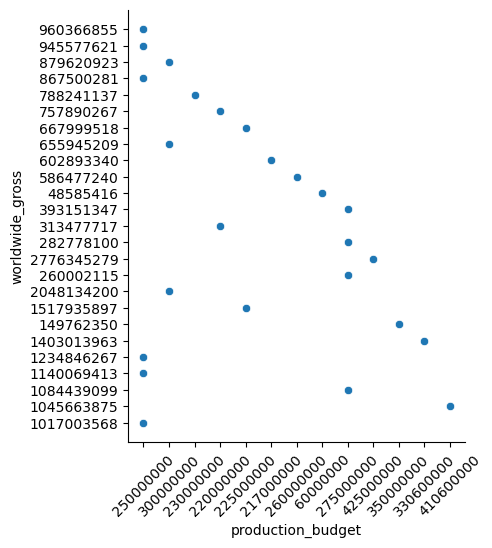

In [54]:
# the correlation between the  budget of a movie and performance at the box office using  pairplot function
sns.pairplot(top25,x_vars = ["production_budget"],y_vars=["worldwide_gross"],height=5);
plt.xticks(rotation=45)


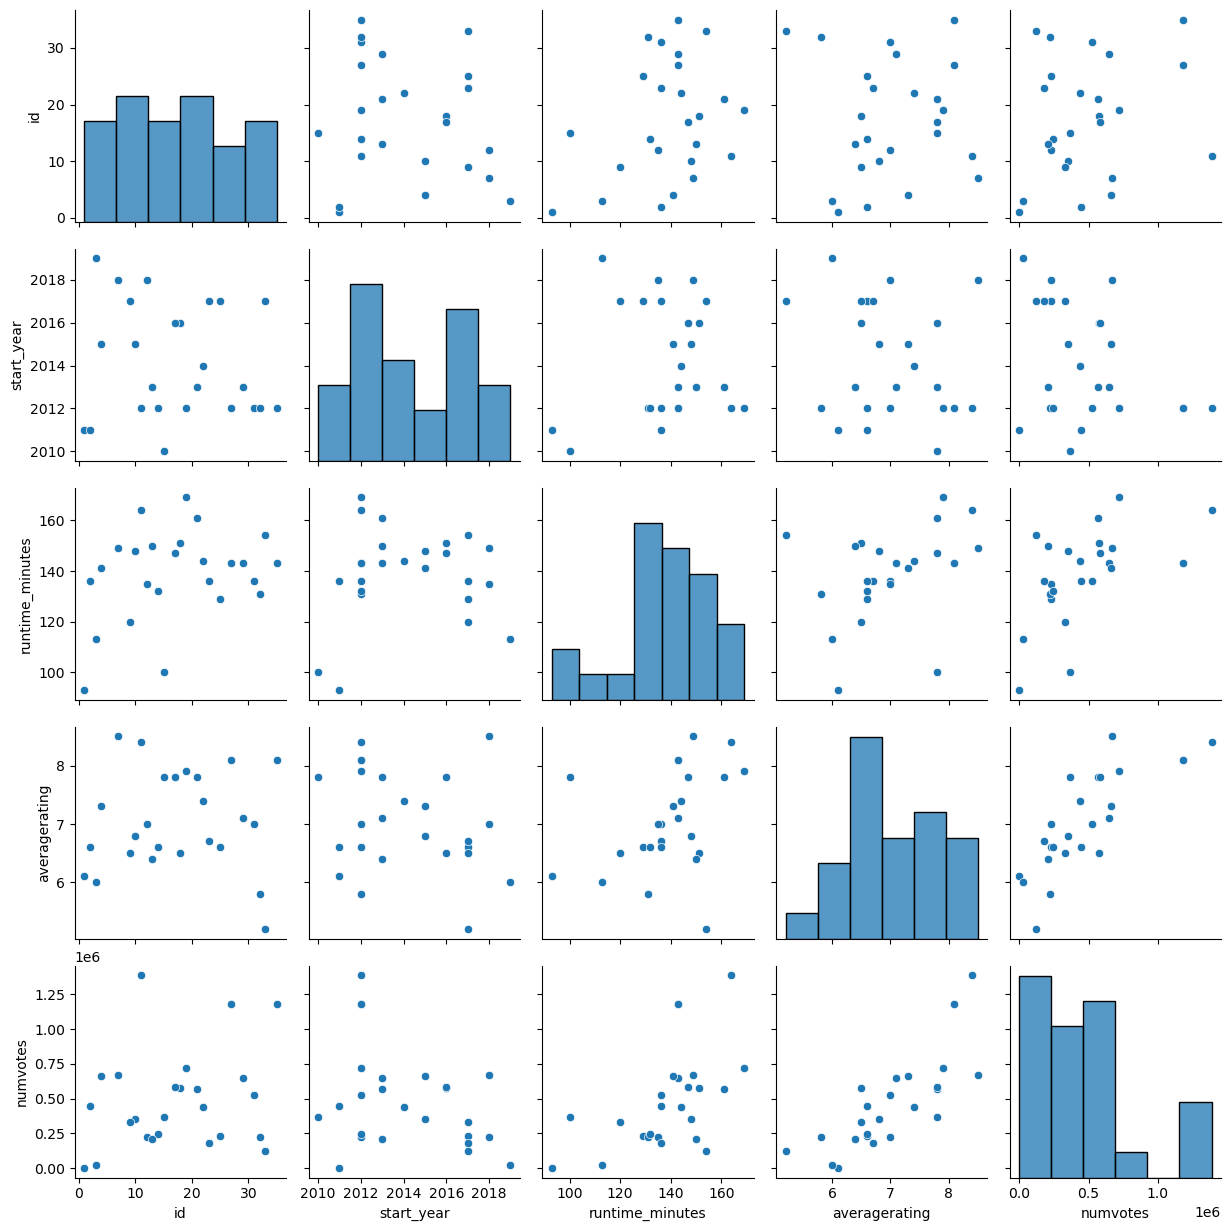

In [55]:
# We need to find the same -1 correlations using a parplot aslo.
sns.pairplot(top25)

(array([5. , 5.5, 6. , 6.5, 7. , 7.5, 8. , 8.5, 9. ]),
 [Text(5.0, 0, '5.0'),
  Text(5.5, 0, '5.5'),
  Text(6.0, 0, '6.0'),
  Text(6.5, 0, '6.5'),
  Text(7.0, 0, '7.0'),
  Text(7.5, 0, '7.5'),
  Text(8.0, 0, '8.0'),
  Text(8.5, 0, '8.5'),
  Text(9.0, 0, '9.0')])

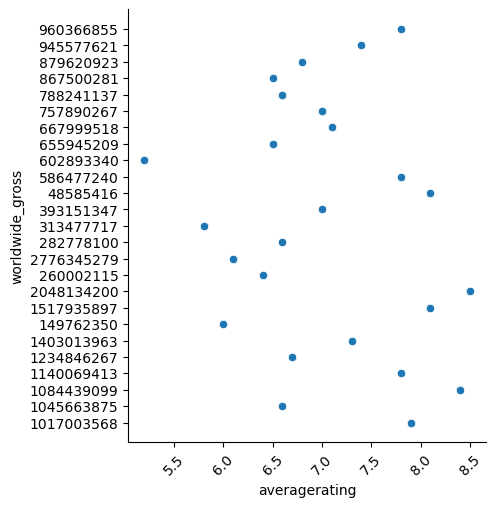

In [56]:


sns.pairplot(top25,x_vars = ["averagerating"],y_vars=["worldwide_gross"],height=5);
plt.xticks(rotation=45)

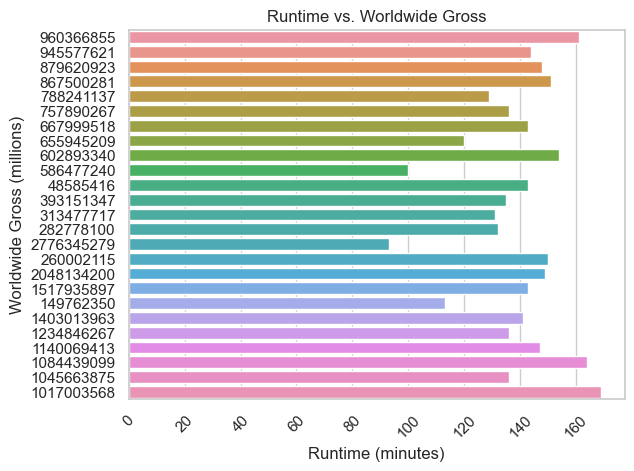

In [57]:


# create a bar chart using seaborn
sns.set(style="whitegrid")
ax = sns.barplot(x="runtime_minutes", y="worldwide_gross", data=top25)

# set the title and axis labels
ax.set_title("Runtime vs. Worldwide Gross")
ax.set_xlabel("Runtime (minutes)")
ax.set_ylabel("Worldwide Gross (millions)")

# rotate the x-axis labels for better visibility
plt.xticks(rotation=45)

# show the plot
plt.show()


In [180]:
# Checking for highest runtime value
merge2["runtime_minutes"].max()

280.0

In [181]:
# checking for the lowest runtime.
merge2["runtime_minutes"].min()

3.0

The  highest and lowest runtime were 3 minutes and 280 minutes respectively.

In [89]:
genres_stats= top25.groupby('genres')["worldwide_gross"].agg(["mean"]).reset_index()
genres_stats.sort_values(by="mean",ascending=False)

,genres,mean
1,"Action,Adventure,Sci-Fi",6.889912e+100
0,"Action,Adventure,Fantasy",1.735001e+45
8,"Adventure,Fantasy",4.801834e+17
9,Horror,2.776345e+09
4,"Action,Crime,Thriller",1.234846e+09
5,"Action,Thriller",1.084439e+09
7,"Adventure,Family,Fantasy",1.017004e+09
2,"Action,Adventure,Thriller",8.796209e+08
6,"Adventure,Animation,Comedy",5.864772e+08
3,"Action,Adventure,Western",2.600021e+08


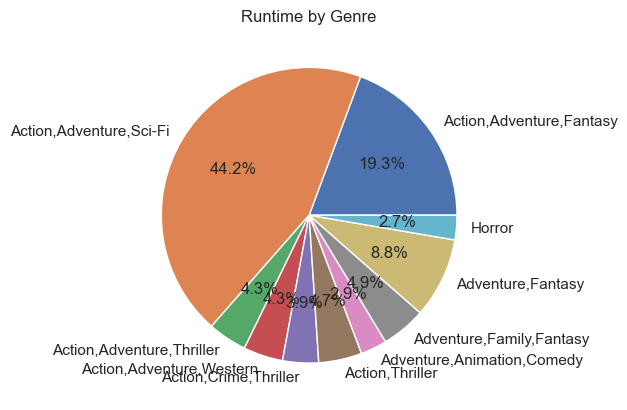

In [120]:

# group the data by genre and calculate the total runtime
genre_runtime = top25.groupby('genres')['runtime_minutes'].sum().reset_index()

# create a pie chart
plt.pie(genre_runtime['runtime_minutes'], labels=genre_runtime['genres'], autopct='%1.1f%%')
plt.title('Runtime by Genre')

# show the plot
plt.show()

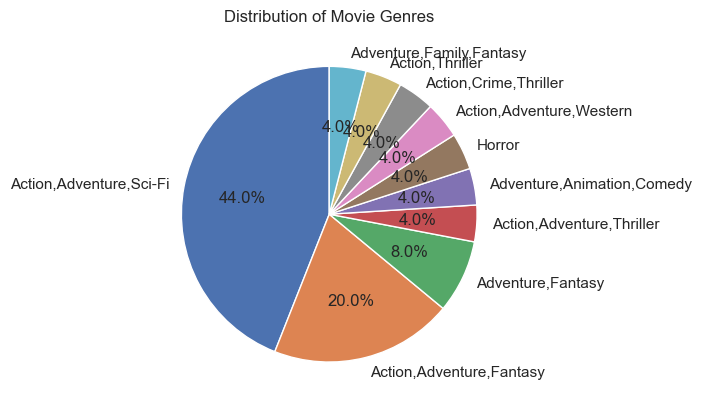

In [97]:
# create a dataframe with the count of movies for each genre
genre_counts = top25["genres"].value_counts()

# create a pie chart
plt.pie(genre_counts, labels=genre_counts.index, autopct="%1.1f%%", startangle=90)

# set the title
plt.title("Distribution of Movie Genres")

# show the plot
plt.show()

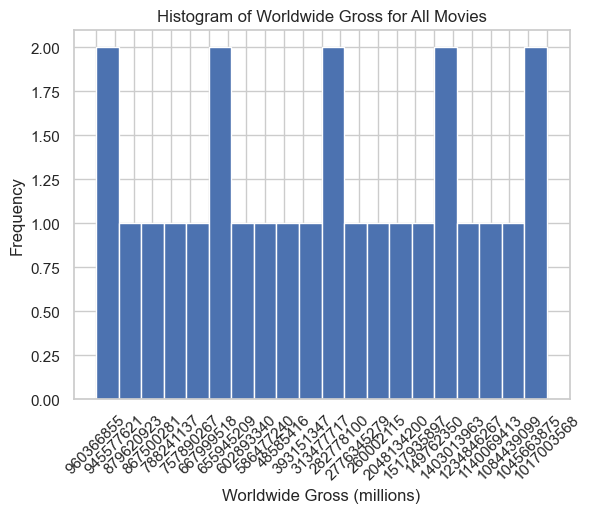

In [112]:
plt.hist(top25['worldwide_gross'], bins=20)
plt.xlabel('Worldwide Gross (millions)')
plt.ylabel('Frequency')
plt.title('Histogram of Worldwide Gross for All Movies')
plt.xticks(rotation=45)
plt.show()


<AxesSubplot:>

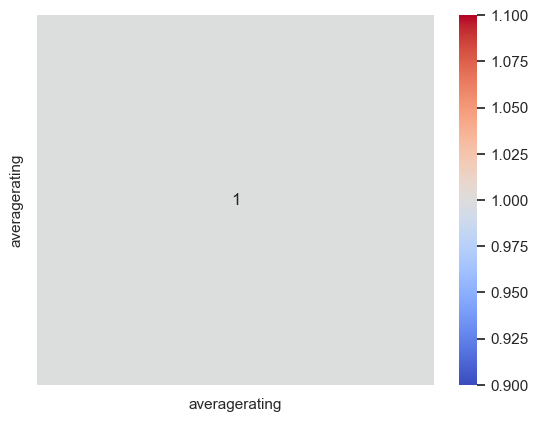

In [124]:
import seaborn as sns

# Heatmap for correlation between movie ratings and revenue
sns.heatmap(top25[['averagerating', 'domestic_gross', 'worldwide_gross']].corr(), annot=True, cmap='coolwarm')


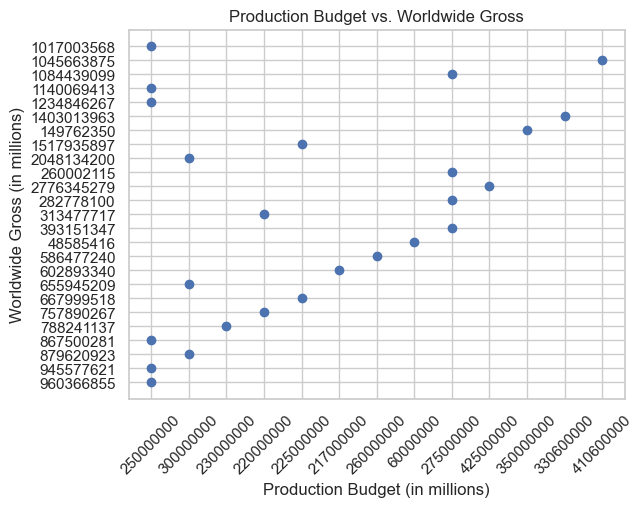

In [152]:
import matplotlib.pyplot as plt

plt.scatter(x='production_budget', y='worldwide_gross', data=top25)
plt.xlabel('Production Budget (in millions)')
plt.ylabel('Worldwide Gross (in millions)')
plt.title('Production Budget vs. Worldwide Gross');
plt.xticks(rotation = 45);
plt.yticks(rotation =0);


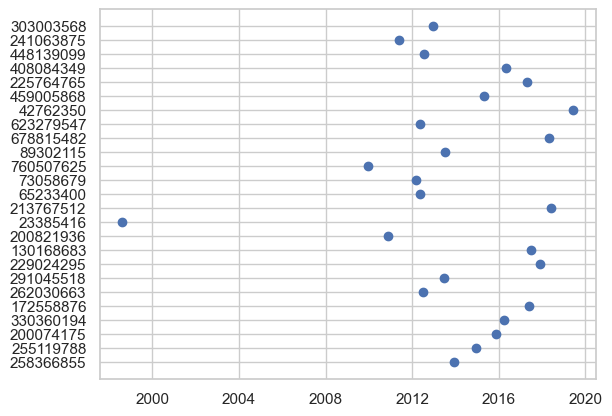

In [159]:
# Create a scatter plot of release date vs domestic gross
plt.scatter(top25['release_date'], top25['domestic_gross'])

C:\Users\Yussuf Hersi\AppData\Local\Temp\ipykernel_3892\902549517.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top25['release_date'] = pd.to_datetime(top25['release_date'])


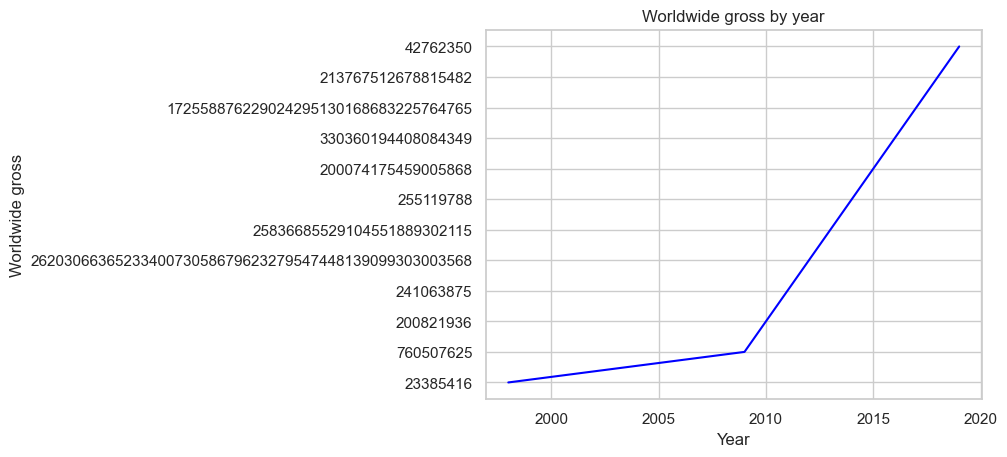

In [163]:
# The trend in worldwide gross earnings for the movies over the years?
# Plot linear smooth plot
top25['release_date'] = pd.to_datetime(top25['release_date'])
yearly_gross = top25.groupby(top25['release_date'].dt.year)['domestic_gross'].sum()
plt.plot(yearly_gross.index, yearly_gross.values, color='blue')
plt.title('Worldwide gross by year')
plt.xlabel('Year')
plt.ylabel('Worldwide gross')
plt.show()

### Evaluation
Based on the data at hand, it is evident that the Action, Science Fiction, and Thriller genres have been consistently performing well, generating high revenue both domestically and globally. Therefore, I would highly recommend Microsoft to invest more in producing movies in these genres. Investing in these genres is likely to result in higher returns and profits.

Moreover, the data suggests that the production budget has a positive correlation with the movie's performance in the domestic market. Therefore, investing at least 150 million dollars in the production budget of a movie is recommended to ensure that it stands out and performs well in the domestic market. This is supported by the fact that movies with higher production budgets tend to have higher domestic gross earnings. Therefore, it is crucial for Microsoft to allocate a sufficient budget to the movies they produce to ensure they have a better chance of performing well in the domestic market. By doing so, Microsoft can increase its chances of generating higher revenue and profits from its movie productions.

As per the data , the best time to release a film is during the month of march of the year which had the highest number of successful releases in the the top 250 films of our dataset.

The movie runtime in minutes that is highly recommended is the runtime of the  113 and 166 minutes of runtime.

The evaluation and the integrity of the insights gathered from the dataset above can improved using more accurate and sophisticated models to make an accurate representation of the movies gross.